# Normalización de texto en inglés

Angel Israel Hernández Testa

## Exploración de texto

Numero total de tokens:  374
Numero total de tokens unicos:  212
[('the', 19), ('of', 16), ('and', 14), ('I', 11), (',', 11), ('a', 10), ('.', 8), ('to', 8), ('in', 7), ('that', 7), ('on', 7), ('language', 6), ('book', 6), ('’', 5), ('me', 5)]


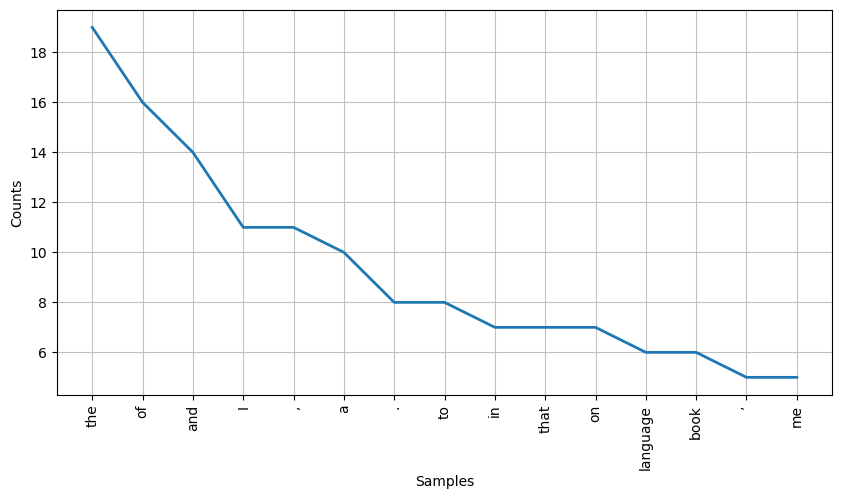

In [27]:
#Se importan las librerías a ocupar para la normalización
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

#Descargas de los recursos necesarios
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')

#Texto que se va a procesar
text="My own journey toward language was sparked in 1996 when I discovered Keith Basso’s astonishing book Wisdom Sits in Places. Writing about the unique place-making language of the Western Apache, Basso described language in a way that I’d never considered before, as roots and fragments strung together to sing of the land. This idea intrigued me so much that I began carrying Donald Borror’s classic little book, the Dictionary of Word Roots and Combining Forms, with me on all my hikes (a practice which I’ve continued on a daily basis for nearly twenty years and on thousands of miles of trails) in order to learn the meaning and origin of word elements at the moment they occurred to me while walking in wild landscapes. For many years this seemed little more than a quirky hobby, with no real intent or direction, but then a friend introduced me to Calvert Watkins’s magisterial survey of Indo-European poetics, How to Kill a Dragon. In a flash I realized that there might be untapped ways for the English language to speak of the magic of the land and the depths of the human spirit, so I began a four-year quest to read every book I could find on the history, formation, and word-making processes of the English language. What you hold here is the result of my investigation: 76 sections that explore some of the many pieces and processes that have gone into shaping the English language as we use it today. As I researched and wrote each section of this book I carried these ideas with me on long hikes in wild places and held them up against the natural world to see which ideas resonated and which ideas took on a life of their own. This book emerges from and reflects these hikes, and because I also lead walks as a naturalist in my professional life this book is modeled on the metaphysic that I know best—the flow of ideas and observations that arise spontaneously when humans encounter the world with curiosity and wonder."
# 1er paso de la normalización será tokenizar el texto usando word_tokenize
tokens=word_tokenize(text)
#calculamos el total de tokens y tokens unicos
total_tokens=len(tokens)
uni_tokens=len(set(tokens))
print("Numero total de tokens: ", total_tokens)
print("Numero total de tokens unicos: ", uni_tokens)

#Calculamos la frecuencia de los token (qué tanto aparecen) y obtenemos los 15 más repetidos
freq_tokens = FreqDist(tokens)
top_15_tokens = freq_tokens.most_common(15)
print(top_15_tokens)
#Se realiza el plot de la figura
plt.figure(figsize=(10, 5))
freq_tokens.plot(15, cumulative=False)

plt.show()

##Normalización

In [34]:
#2do paso de normalización es transformar el texto a minúscula, usando .lower()
tokens_lowercase = [token.lower() for token in tokens]
print(tokens_lowercase)

['my', 'own', 'journey', 'toward', 'language', 'was', 'sparked', 'in', '1996', 'when', 'i', 'discovered', 'keith', 'basso', '’', 's', 'astonishing', 'book', 'wisdom', 'sits', 'in', 'places', '.', 'writing', 'about', 'the', 'unique', 'place-making', 'language', 'of', 'the', 'western', 'apache', ',', 'basso', 'described', 'language', 'in', 'a', 'way', 'that', 'i', '’', 'd', 'never', 'considered', 'before', ',', 'as', 'roots', 'and', 'fragments', 'strung', 'together', 'to', 'sing', 'of', 'the', 'land', '.', 'this', 'idea', 'intrigued', 'me', 'so', 'much', 'that', 'i', 'began', 'carrying', 'donald', 'borror', '’', 's', 'classic', 'little', 'book', ',', 'the', 'dictionary', 'of', 'word', 'roots', 'and', 'combining', 'forms', ',', 'with', 'me', 'on', 'all', 'my', 'hikes', '(', 'a', 'practice', 'which', 'i', '’', 've', 'continued', 'on', 'a', 'daily', 'basis', 'for', 'nearly', 'twenty', 'years', 'and', 'on', 'thousands', 'of', 'miles', 'of', 'trails', ')', 'in', 'order', 'to', 'learn', 'the',

In [35]:
#3er paso eliminamos los signos de puntuación. haciendo uso de un conjunto (set) de signos
punctuation_signs = set(string.punctuation)
#elimna los signos de puntuación sobre el texto en minusculas y guardamos el resultado en un arreglo tk
tk=[w for w in tokens_lowercase if not w in punctuation_signs]
print(tk)

['my', 'own', 'journey', 'toward', 'language', 'was', 'sparked', 'in', '1996', 'when', 'i', 'discovered', 'keith', 'basso', '’', 's', 'astonishing', 'book', 'wisdom', 'sits', 'in', 'places', 'writing', 'about', 'the', 'unique', 'place-making', 'language', 'of', 'the', 'western', 'apache', 'basso', 'described', 'language', 'in', 'a', 'way', 'that', 'i', '’', 'd', 'never', 'considered', 'before', 'as', 'roots', 'and', 'fragments', 'strung', 'together', 'to', 'sing', 'of', 'the', 'land', 'this', 'idea', 'intrigued', 'me', 'so', 'much', 'that', 'i', 'began', 'carrying', 'donald', 'borror', '’', 's', 'classic', 'little', 'book', 'the', 'dictionary', 'of', 'word', 'roots', 'and', 'combining', 'forms', 'with', 'me', 'on', 'all', 'my', 'hikes', 'a', 'practice', 'which', 'i', '’', 've', 'continued', 'on', 'a', 'daily', 'basis', 'for', 'nearly', 'twenty', 'years', 'and', 'on', 'thousands', 'of', 'miles', 'of', 'trails', 'in', 'order', 'to', 'learn', 'the', 'meaning', 'and', 'origin', 'of', 'word

In [36]:
#4to paso eliminamos las stop words haciendo uso de un set de stopwords de la librería nltk
stop_words=set(stopwords.words("english"))
#Se muestra el set de stopwords
print(stop_words)
#Se eliminan las stopwords del texto anterior y se guarda en un nuevo arreglo filtrado
filtered_text=[w for w in tk if not w in stop_words]
print(filtered_text)

{'my', 'nor', 'don', "isn't", "it's", 'out', 'to', 'did', 'won', 'down', 'such', 'these', "you'd", 'more', 'most', 'of', 'our', 'hadn', 'once', "wouldn't", 'this', 'when', 'after', 'because', 'there', "aren't", 'am', 'all', "should've", 'doing', 'any', 'other', 'o', 'has', 'were', 'by', 'during', "that'll", 'being', 'himself', 'in', "won't", 'above', 'we', 'from', 'no', 'too', 'ourselves', 'i', 'which', 'below', "didn't", "haven't", "hasn't", 'she', 'had', "mustn't", 'ma', 've', 'you', 'yourselves', "you've", 'into', 'now', 'me', 'your', 'hers', 'itself', "don't", 'but', 't', 'under', "mightn't", "shouldn't", 'own', 'are', 'yours', 'so', 'very', 'just', 'didn', 'yourself', "she's", "couldn't", 'those', 'what', 'who', 'was', 'some', 's', 'shouldn', 'do', 'theirs', 'before', "wasn't", 'as', 'where', 'through', "shan't", 'm', 'about', 're', 'their', 'whom', 'aren', 'd', 'an', 'doesn', "you'll", 'herself', 'again', 'he', 'does', 'have', 'over', 'it', 'mustn', 'how', 'haven', 'until', 'myse

In [37]:
#5to paso será lematizar el texto haciendo uso del lemmatizer de nltk WordNet y se guarda el resultado en un nuevo arreglo lematizado
lemmatizer = WordNetLemmatizer()
lemmatized_text=[]
for w in filtered_text:
  lemmatized_text.append(lemmatizer.lemmatize(w))

print(lemmatized_text)

writing
['journey', 'toward', 'language', 'sparked', '1996', 'discovered', 'keith', 'basso', '’', 'astonishing', 'book', 'wisdom', 'sits', 'place', 'writing', 'unique', 'place-making', 'language', 'western', 'apache', 'basso', 'described', 'language', 'way', '’', 'never', 'considered', 'root', 'fragment', 'strung', 'together', 'sing', 'land', 'idea', 'intrigued', 'much', 'began', 'carrying', 'donald', 'borror', '’', 'classic', 'little', 'book', 'dictionary', 'word', 'root', 'combining', 'form', 'hike', 'practice', '’', 'continued', 'daily', 'basis', 'nearly', 'twenty', 'year', 'thousand', 'mile', 'trail', 'order', 'learn', 'meaning', 'origin', 'word', 'element', 'moment', 'occurred', 'walking', 'wild', 'landscape', 'many', 'year', 'seemed', 'little', 'quirky', 'hobby', 'real', 'intent', 'direction', 'friend', 'introduced', 'calvert', 'watkins', '’', 'magisterial', 'survey', 'indo-european', 'poetics', 'kill', 'dragon', 'flash', 'realized', 'might', 'untapped', 'way', 'english', 'langua

In [30]:
#6to paso, se realiza stemming sobre el texto anterior usando SnowballStemmer de nltk. Se guarda en el arreglo stemmed_text
snowball_stemmer = SnowballStemmer('english')
stemmed_text=[]
for w in lemmatized_text:
  stemmed_text.append(snowball_stemmer.stem(w))

print(stemmed_text)

['journey', 'toward', 'languag', 'spark', '1996', 'discov', 'keith', 'basso', '’', 'astonish', 'book', 'wisdom', 'sit', 'place', 'write', 'uniqu', 'place-mak', 'languag', 'western', 'apach', 'basso', 'describ', 'languag', 'way', '’', 'never', 'consid', 'root', 'fragment', 'strung', 'togeth', 'sing', 'land', 'idea', 'intrigu', 'much', 'began', 'carri', 'donald', 'borror', '’', 'classic', 'littl', 'book', 'dictionari', 'word', 'root', 'combin', 'form', 'hike', 'practic', '’', 'continu', 'daili', 'basi', 'near', 'twenti', 'year', 'thousand', 'mile', 'trail', 'order', 'learn', 'mean', 'origin', 'word', 'element', 'moment', 'occur', 'walk', 'wild', 'landscap', 'mani', 'year', 'seem', 'littl', 'quirki', 'hobbi', 'real', 'intent', 'direct', 'friend', 'introduc', 'calvert', 'watkin', '’', 'magisteri', 'survey', 'indo-european', 'poetic', 'kill', 'dragon', 'flash', 'realiz', 'might', 'untap', 'way', 'english', 'languag', 'speak', 'magic', 'land', 'depth', 'human', 'spirit', 'began', 'four-year'

In [31]:
#7mo finalmente para la normalización se hará un etiquetado de part-of-speech (pos tag) con el metodo pos_tag de nltk
postag_text=nltk.pos_tag(stemmed_text)
print(postag_text)

[('journey', 'NN'), ('toward', 'IN'), ('languag', 'NN'), ('spark', 'NN'), ('1996', 'CD'), ('discov', 'NN'), ('keith', 'NN'), ('basso', 'NN'), ('’', 'NNP'), ('astonish', 'JJ'), ('book', 'NN'), ('wisdom', 'NN'), ('sit', 'NN'), ('place', 'NN'), ('write', 'JJ'), ('uniqu', 'JJ'), ('place-mak', 'JJ'), ('languag', 'NN'), ('western', 'JJ'), ('apach', 'NN'), ('basso', 'NN'), ('describ', 'NN'), ('languag', 'JJ'), ('way', 'NN'), ('’', 'NNP'), ('never', 'RB'), ('consid', 'VBP'), ('root', 'JJ'), ('fragment', 'NN'), ('strung', 'NN'), ('togeth', 'IN'), ('sing', 'VBG'), ('land', 'NN'), ('idea', 'NN'), ('intrigu', 'RB'), ('much', 'JJ'), ('began', 'VBD'), ('carri', 'JJ'), ('donald', 'NN'), ('borror', 'NN'), ('’', 'NNP'), ('classic', 'JJ'), ('littl', 'NN'), ('book', 'NN'), ('dictionari', 'NN'), ('word', 'NN'), ('root', 'NN'), ('combin', 'NN'), ('form', 'NN'), ('hike', 'NN'), ('practic', 'JJ'), ('’', 'NNP'), ('continu', 'NN'), ('daili', 'NN'), ('basi', 'NN'), ('near', 'IN'), ('twenti', 'JJ'), ('year', 'NN

##Exploración de texto post normalización

Numero total de tokens:  178
Numero total de tokens unicos:  138
[('languag', 6), ('book', 6), ('’', 5), ('idea', 5), ('hike', 3), ('english', 3), ('basso', 2), ('place', 2), ('way', 2), ('root', 2), ('land', 2), ('began', 2), ('carri', 2), ('littl', 2), ('word', 2)]


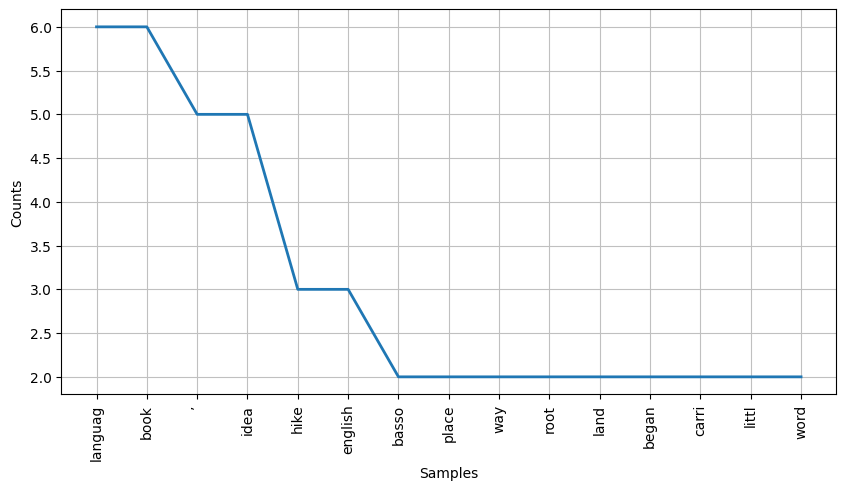

In [33]:
#Realizamos nuevamente el conteo de tokens y tokens unicos sobre el texto normalizado
new_total_tokens=len(stemmed_text)
new_uni_tokens=len(set(stemmed_text))
print("Numero total de tokens: ", new_total_tokens)
print("Numero total de tokens unicos: ", new_uni_tokens)
#Se calcula la frecuencia de tokens para el texto normalizado y los 15 tokens más comunes
new_freq_tokens = FreqDist(stemmed_text)
new_top_15_tokens = new_freq_tokens.most_common(15)
print(new_top_15_tokens)
#plot de los nuevos 15 tokens
plt.figure(figsize=(10, 5))
new_freq_tokens.plot(15, cumulative=False)

plt.show()